In [9]:
import pyttsx3
import librosa
import matplotlib.pyplot as plt
""" from pydub import AudioSegment
import subprocess
import os
 """

def evaluate_text_to_speech_system(text):
    # Initialize the pyttsx3 engine
    engine = pyttsx3.init()

    # Set the rate and volume of the speech
    engine.setProperty('rate', 150)
    engine.setProperty('volume', 1.0)

    # Convert text to speech
    engine.say(text)
    engine.runAndWait()

    # Get MOS score from user input
    mos_score = int(input("Please rate the audio quality on a scale of 1 to 5: "))

    return mos_score



text = "I am so sad these days.	"

evaluate_text_to_speech_system(text)

2

In [10]:
def text_to_speech(text, output_file):
    # Initialize pyttsx3 engine
    engine = pyttsx3.init()

    # Set the desired output format (MP3)
    engine.setProperty("audio_format", "mp3")

    # Save audio directly as MP3 file
    engine.save_to_file(text, output_file)
    engine.runAndWait()

# Example usage
output_file = "output.mp3"
text_to_speech(text, output_file)

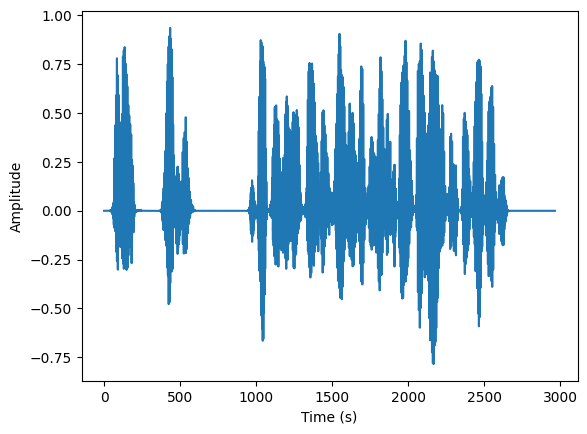

In [11]:
audio_fil= "E:\Samsung\output.mp3" 
audio_data, sample_rate = librosa.load(audio_fil, sr=None)

# Calculate time array
time = librosa.times_like(audio_data, sr=sample_rate)

# Plot audio data as waveform
plt.plot(time, audio_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [30]:
def evaluate_text_to_speech_system(text, voice="english"):
    # Initialize the pyttsx3 engine
    engine = pyttsx3.init()

    # Set the voice
    voices = engine.getProperty('voices')
    for v in voices:
        if v.name == voice:
            engine.setProperty('voice', v.id)
            break

    # Say the text out loud
    engine.say(text)
    engine.runAndWait()

    # Save the synthesized speech to a file using soundfile
    audio_file = "output.wav"
    engine.save_to_file(text, audio_file)
    engine.runAndWait()

    # Calculate MOS score and intelligibility score for audio file
    mos_score = calculate_mos_score(audio_file)

    # Print MOS score
    print("MOS score for audio file: ", mos_score)

    return mos_score

In [12]:
import speech_recognition as sr
#To convert audio into mp3 using in WER

def transcribe_audio(mp3_file):
    # Initialize the recognizer
    r = sr.Recognizer()

    # Load the audio file
    with sr.AudioFile(mp3_file) as source:
        audio = r.record(source)

    # Perform speech recognition
    try:
        transcription = r.recognize_google(audio)
        return transcription
    except sr.UnknownValueError:
        print("Speech recognition could not understand audio")
    except sr.RequestError as e:
        print("Could not request results from speech recognition service; {0}".format(e))

    return ""

# Example usage
mp3_file = "output.mp3"
transcription = transcribe_audio(mp3_file)
print("Transcription:", transcription)


Transcription: I am so sad these days


In [13]:
import Levenshtein

def calculate_wer(reference_text, generated_text):
    # Tokenize the reference and generated texts
    ref_tokens = reference_text.lower().split()
    gen_tokens = generated_text.lower().split()

    # Calculate the WER using Levenshtein distance
    wer = Levenshtein.distance(" ".join(ref_tokens), " ".join(gen_tokens)) / len(ref_tokens)

    return wer

wer = calculate_wer(text, transcription)
print("WER:", wer)

WER: 0.16666666666666666


In [8]:
from pydub import AudioSegment
from pydub.playback import play
from pydub.silence import split_on_silence
from pydub.utils import make_chunks
#from alignment import align

def calculate_aer(synthesized_audio_file, reference_audio_file):
    # Load the synthesized and reference audio files
    synthesized_audio = AudioSegment.from_file(synthesized_audio_file)
    reference_audio = AudioSegment.from_file(reference_audio_file)

    # Split the audio files into chunks based on silence
    synthesized_chunks = split_on_silence(synthesized_audio, min_silence_len=500, silence_thresh=-40)
    reference_chunks = split_on_silence(reference_audio, min_silence_len=500, silence_thresh=-40)

    # Calculate the alignment using the alignment module
    alignment = align(reference_chunks, synthesized_chunks)

    # Count the alignment errors
    alignment_errors = sum(len(a) for a in alignment.values())

    # Calculate the Alignment Error Rate (AER)
    alignment_error_rate = (alignment_errors / len(reference_chunks)) * 100

    return alignment_error_rate

# Example usage
synthesized_audio_file = 'output.mp3'
reference_audio_file = 'output.mp3'
aer = calculate_aer(synthesized_audio_file, reference_audio_file)
print("Alignment Error Rate (AER):", aer)

c:\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
c:\Python311\Lib\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [18]:
import pandas as pd
import librosa
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv('emotions.csv')

# Replace missing values with an empty string
df['Text'].fillna('', inplace=True)

# Extract input features (X) and labels (y)
X = df['Text'].values
y = df['Emotion'].values
print(X)
print('Labels (y):')
print(y)

# Convert emotions to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Load and process the audio file
audio_file = 'output.mp3'
audio_data, sr = librosa.load(audio_file, duration=3)  # Load only the first 3 seconds
audio_text = librosa.feature.mfcc(y=audio_data, sr=sr)

# Convert the audio text array to string representation
audio_text_str = ' '.join(map(str, audio_text))

# Vectorize the audio text using the same TF-IDF vectorizer
audio_text_vectorized = vectorizer.transform([audio_text_str])

# Make predictions on the audio text
predicted_label = label_encoder.inverse_transform(model.predict(audio_text_vectorized))

# Print the prediction
print(predicted_label)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


['Anger' 'Anger' 'Anger' ... 'Surprise' 'Surprise' 'Surprise']
Labels (y):
['it is frustrating waiting on hold to speak to a human\t\t\t\t\t\t\r\nAnger-2'
 "I want you to act like he's coming back both of you. Don't think I haven't noticed you since he invited her here. I won't stand for any nonsense.\t\t\t\t\t\r\nAnger-3"
 'Tired of people going  five  zero  six  zero  down my side street. There are kids and animals here and the police never do anything about these wreckless drivers.\t\t\t\t\t\t\r\nAnger-4'
 ... 'I woke up to breakfast in be this morning.\t\t\t\t\r\nSurprise-327'
 "My sister made me a cake for my birthday! I wasn't expecting that at all\t\t\t\t\r\nSurprise-328"
 'Been making a lot of money off of my hobby lately. I think this thing might take off and I can quit my day job... I had no idea that would happen\t or that people would enjoy my work enough to do that.']


ValueError: np.nan is an invalid document, expected byte or unicode string.